In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score, classification_report

# ** Importing dataset into the notebook**

In [5]:
df = pd.read_csv('/kaggle/input/fraud-transaction-detection/Final Transactions.csv')

### **Displaying first 20 rows**

In [6]:
df.head(20)

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
5,5,5,2023-01-01 00:10:45,568,8803,401.17,645,0,0,0
6,6,6,2023-01-01 00:11:30,2803,5490,938.54,690,0,0,0
7,7,7,2023-01-01 00:11:44,4684,2486,206.53,704,0,0,0
8,8,8,2023-01-01 00:11:53,4128,8354,253.47,713,0,0,0
9,9,9,2023-01-01 00:13:44,541,6212,555.63,824,0,0,0


### **Displaying all column information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


### **Checking if any fields are empty, and require data cleaning**

In [8]:
df.isna().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

### **No field is empty. Dataset does not have null values. So, no data cleaning is required**

## Split dataset into training and test datasets

In [9]:
df, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
print(f"Size of Train Dataset: {len(df)}")
print(f"Size of Test Dataset: {len(test_data)}")

Size of Train Dataset: 1403324
Size of Test Dataset: 350831


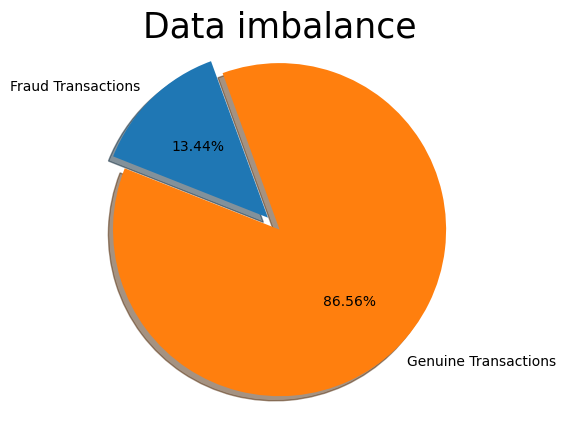

In [11]:
count1 = len(df[df['TX_FRAUD'] == 1])
count0 = len(df[df['TX_FRAUD'] == 0])

count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraud Transactions','Genuine Transactions']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.2f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

## Dataset set is imbalanced with fradulant transactions accounting to ~ 13%

## **Some additional visualizations**

In [12]:
import plotly.express as px

df["month"] = pd.DatetimeIndex(df["TX_DATETIME"]).month

grouped = df.groupby(["month", "TX_FRAUD"]).size().reset_index(name="count")

fig = px.bar(grouped, x="month", y="count", color="TX_FRAUD", barmode="group",
             labels={"month": "Month", "count": "Number of Transactions", "TX_FRAUD": "Transaction Type"})

fig.show()

In [13]:
df = pd.read_csv("/kaggle/input/fraud-transaction-detection/Final Transactions.csv")
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]
grouped = df.groupby("TX_FRAUD_SCENARIO").size().reset_index(name="count")

fig = px.bar(grouped, x="TX_FRAUD_SCENARIO", y="count", color="TX_FRAUD_SCENARIO",
             labels={"TX_FRAUD_SCENARIO": "Fraud Scenario", "count": "Number of Transactions"})

fig.show()

## **Since fradulant scenario is extremenly imbalanced and most of the fraud transactions are in category 1, it has not been used as a classification category**

# **Upsampling**

In [14]:
from imblearn.over_sampling import SMOTE

# Convert TX_DATETIME column to Unix timestamp
df['TX_DATETIME'] = dd.to_datetime(df['TX_DATETIME']).apply(lambda x: x.timestamp())

# Separate features and labels
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

# Apply SMOTE to upsample the minority class
desired_ratio = 0.5
sm = SMOTE(sampling_strategy=desired_ratio, random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Create a new DataFrame with the upsampled data
df_resampled = dd.concat([dd.DataFrame(X_resampled), dd.DataFrame(y_resampled)], axis=1)
df_resampled.columns = df.columns

# Convert Unix timestamp back to datetime object
df_resampled['TX_DATETIME'] = dd.to_datetime(df_resampled['TX_DATETIME'], unit='s')

df_upsampled = dd.concat([df_resampled.loc[df_resampled['TX_FRAUD'] == 1], df_resampled.loc[df_resampled['TX_FRAUD'] == 0]])


df_upsampled.to_csv('upsampled_transactions.csv', index=False)

df = df_upsampled

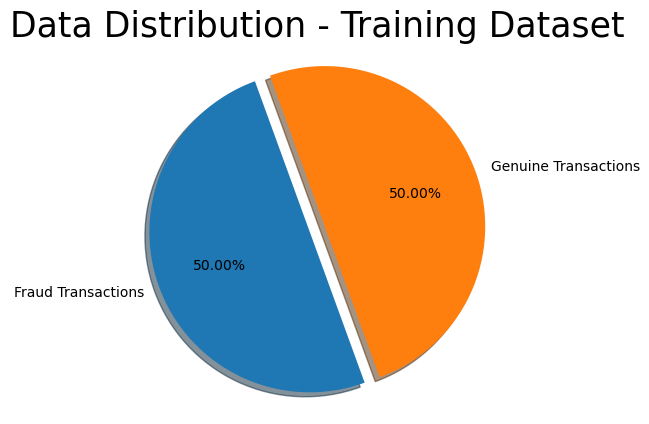

In [15]:
count1 = len(df[df['TX_FRAUD'] == 1])
count0 = len(df[df['TX_FRAUD'] == 0])

count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraud Transactions','Genuine Transactions']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.2f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data Distribution - Training Dataset',fontsize=25)
plt.show()

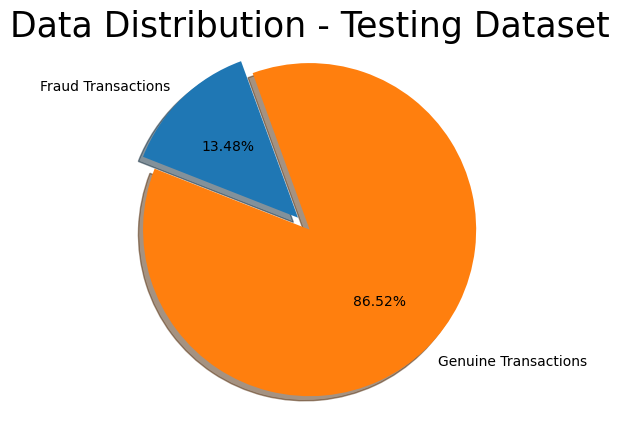

In [16]:
count1 = len(test_data[test_data['TX_FRAUD'] == 1])
count0 = len(test_data[test_data['TX_FRAUD'] == 0])

count1 = (count1/len(test_data['TX_FRAUD']))*100
count0 = (count0/len(test_data['TX_FRAUD']))*100

x = ['Fraud Transactions','Genuine Transactions']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.2f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data Distribution - Testing Dataset',fontsize=25)
plt.show()

In [17]:
df_features = df.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','Unnamed: 0','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)

print(df_features.head())

   TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS
0     619.72         11867589           137
1     613.22          3542397            40
2     244.61           758284             8
3    1153.51         11954270           138
4    1069.19           571332             6


In [18]:
df_features.head()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,619.72,11867589,137
1,613.22,3542397,40
2,244.61,758284,8
3,1153.51,11954270,138
4,1069.19,571332,6


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_features)

In [20]:
X = standardized_features
y = df["TX_FRAUD"]

X_train = X
y_train = y

X_test = test_data.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','Unnamed: 0','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)
y_test = test_data["TX_FRAUD"]

# **Running 4 models with standard hyperparameters**
### Models:
### 1. Random Forest
### 2. K-Nearest Neighbors
### 3. Decision Tree
### 4. Logistic Regression

In [18]:
models = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

score = []
accuracy = []

for name, model in models.items():
    print(f"Model Being trained now: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    rc = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy.append(acc)
    score.append(precision)
    score.append(rc)
    score.append(f1)
    
    
    print(f"{name}. Testing accuracy: {acc:.3f}")
    print("Testing Classification Report:\n", classification_report(y_test, y_pred, target_names=['Genuine Transaction', 'Fraud Transaction']))
    
    print(f"Finished Training: {name} \n\n ------------ \n\n")

Model Being trained now: Random Forest
Random Forest. Testing accuracy: 0.973
Testing Classification Report:
                      precision    recall  f1-score   support

Genuine Transaction       0.98      1.00      0.99    303524
  Fraud Transaction       0.95      0.98      0.96     47307

           accuracy                           0.97    350831
          macro avg       0.97      0.99      0.97    350831
       weighted avg       0.98      0.99      0.98    350831

Finished Training: Random Forest 

 ------------ 


Model Being trained now: K-Nearest Neighbors
K-Nearest Neighbors. Testing accuracy: 0.874
Testing Classification Report:
                      precision    recall  f1-score   support

Genuine Transaction       0.93      0.91      0.91    303524
  Fraud Transaction       0.85      0.93      0.88     47307

           accuracy                           0.87    350831
          macro avg       0.89      0.92      0.89    350831
       weighted avg       0.92      0.91

# **Model comparision**
# **Accuracy comparision**

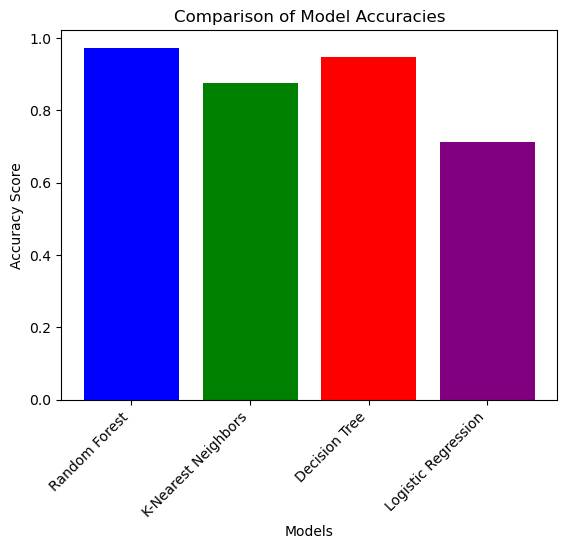

In [1]:
import matplotlib.pyplot as plt

# Accuracy scores for each model

# Models' names
models = ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression']

# Plotting the bar chart
colors = ['blue', 'green', 'red', 'purple']
plt.bar(models, accuracy, color=colors)
# Adding labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha='right')
# Displaying the plot
plt.show()


# **Precision comparision**

[0.98, 0.92, 0.96, 0.69]


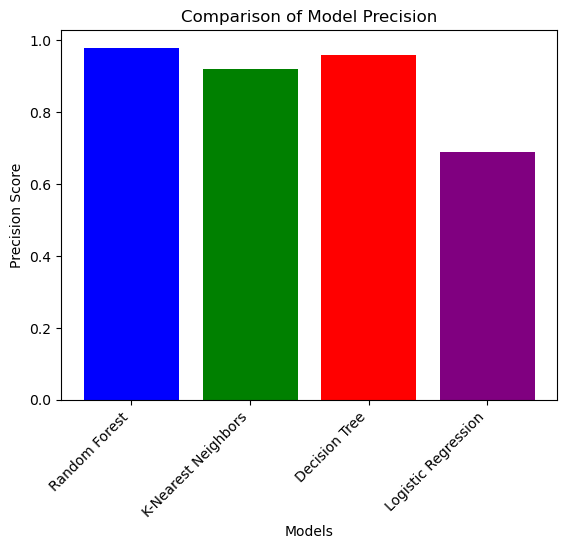

In [4]:
import matplotlib.pyplot as plt

# Accuracy scores for each model

precision = score[::3]

print(precision)
# Models' names
models = ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression']

# Plotting the bar chart

colors = ['blue', 'green', 'red', 'purple']
plt.bar(models, precision, color=colors)
# Adding labels and title
plt.xlabel("Models")
plt.ylabel("Precision Score")
plt.title("Comparison of Model Precision")
plt.xticks(rotation=45, ha='right')
# Displaying the plot
plt.show()


# **Recall comparision**

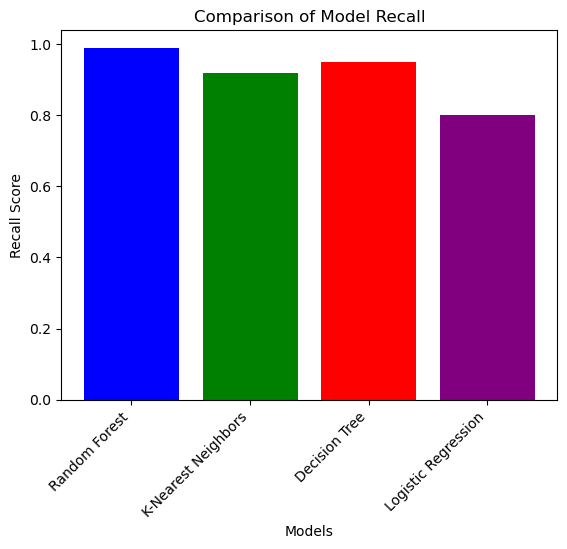

In [6]:
import matplotlib.pyplot as plt

# Accuracy scores for each model

recall = score[1::3]


# Models' names
models = ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression']

# Plotting the bar chart

colors = ['blue', 'green', 'red', 'purple']
plt.bar(models, recall, color=colors)
# Adding labels and title
plt.xlabel("Models")
plt.ylabel("Recall Score")
plt.title("Comparison of Model Recall")
plt.xticks(rotation=45, ha='right')
# Displaying the plot
plt.show()


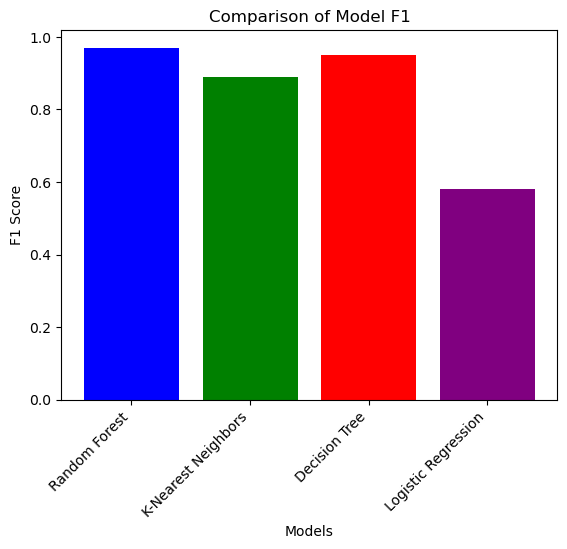

In [9]:
import matplotlib.pyplot as plt

# Accuracy scores for each model

f1 = score[2::3]

# Models' names
models = ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression']

# Plotting the bar chart

colors = ['blue', 'green', 'red', 'purple']
plt.bar(models, f1, color=colors)
# Adding labels and title
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Comparison of Model F1")
plt.xticks(rotation=45, ha='right')
# Displaying the plot
plt.show()


## Out of the 4 models, we are keeping Decision Trees, Random Forest, K-Nearest Neighbors; to tune hyperparameters and understand the best hyperparameters for each of these models.

# **Decision Trees**

## **Hyperparameter optimization for Decision Trees**

In [22]:
decisionTreeClassifier = DecisionTreeClassifier()

hyperparameters_grid_search_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search_dt = GridSearchCV(decisionTreeClassifier,
                              hyperparameters_grid_search_dt,
                              cv=5,
                              scoring='f1_macro',
                              verbose=4)

grid_search_dt.fit(X_train, y_train)

print("Chosen hyperparameters that give best results in decision trees: ")
print(grid_search_dt.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.983 total time=   6.9s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.983 total time=   7.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.982 total time=   6.7s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.983 total time=   7.0s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.983 total time=   7.1s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.983 total time=   7.2s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.983 total time=   7.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.982 total time=   6.8s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.983 total time=   6.7s
[CV 5/5] END max_depth=5, min_samples_leaf=1, m

## **Training Decision Trees using the above selected Hyperparameters**

In [23]:
decisionTreeClassifier = DecisionTreeClassifier(max_depth = None,
                                                min_samples_leaf=1,
                                                min_samples_split=2)
decisionTreeClassifier.fit(X_train, y_train)

decision_trees_prediction = decisionTreeClassifier.predict(X_test)

decision_trees_accuracy = accuracy_score(y_test, decision_trees_prediction)
decision_trees_confusionMatrix = confusion_matrix(y_test, decision_trees_prediction)

## **Classification Report**

In [24]:
print("Classification Report:\n", classification_report(y_test, decision_trees_prediction, target_names=['Genuine Transaction', 'Fraud Transaction']))

Classification Report:
                      precision    recall  f1-score   support

Genuine Transaction       1.00      1.00      1.00    303524
  Fraud Transaction       1.00      1.00      1.00     47307

           accuracy                           1.00    350831
          macro avg       1.00      1.00      1.00    350831
       weighted avg       1.00      1.00      1.00    350831



## **Confusion Matrix**

Text(0.5, 1.0, 'Decision Trees - Confusion Matrix')

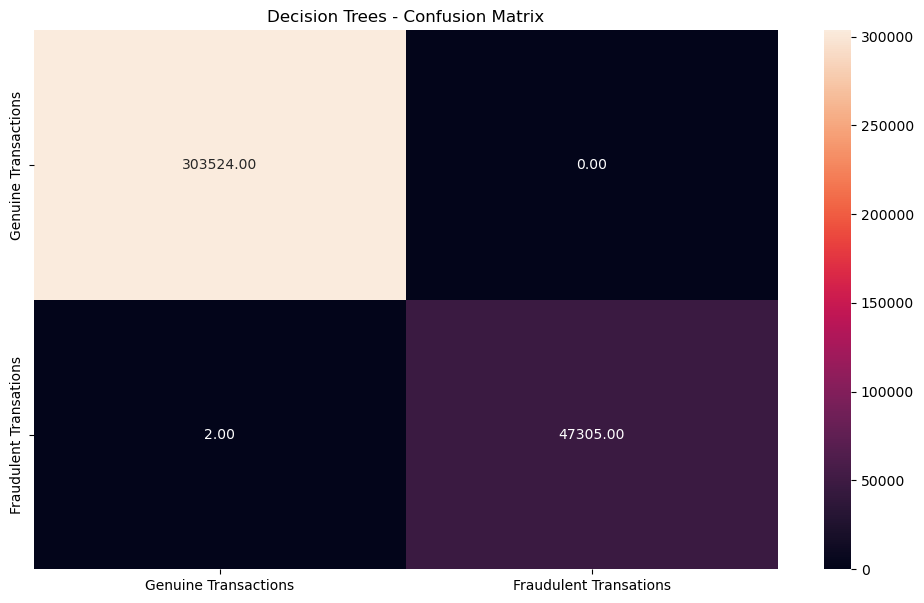

In [25]:
tx_types = ["Genuine Transactions", "Fraudulent Transations"]
df_cm_dt = pd.DataFrame(decision_trees_confusionMatrix,
                     index = [i for i in tx_types],
                     columns = [i for i in tx_types])

plt.figure(figsize = (12,7))
seaborne_conf_matrix_dt = sns.heatmap(df_cm_dt,annot=True, fmt='.2f')
seaborne_conf_matrix_dt.set_title('Decision Trees - Confusion Matrix')

# **Random Forest**


## **Hyperparameter optimization for Random Forest**

In [19]:
randomForestClassifier = RandomForestClassifier()

hyperparameters_grid_search_rf = {
    'max_depth' : [None, 5, 15],
    'criterion' :['gini', 'entropy'],
    'n_estimators': [100, 200]
}

grid_search_rf = GridSearchCV(randomForestClassifier,
                              hyperparameters_grid_search_rf,
                              cv=5,
                              scoring='f1_macro',
                              verbose=4)

grid_search_rf.fit(X_train, y_train)

print("Chosen hyperparameters that give best results in Random Forests: ")
print(grid_search_rf.best_params_)

Chosen hyperparameters that give best results in Random Forests: 
{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}


## **Training Random Forest using the above selected Hyperparameters**

In [23]:
randomForestClassifier = RandomForestClassifier(criterion = 'gini',
                                                max_depth = None,
                                                n_estimators = 200)
randomForestClassifier.fit(X_train, y_train)

random_forests_prediction = randomForestClassifier.predict(X_test)

random_forests_accuracy = accuracy_score(y_test, random_forests_prediction)
random_forests_confusionMatrix = confusion_matrix(y_test, random_forests_prediction)

## **Classification Report**

In [24]:
print("Classification Report:\n", classification_report(y_test, random_forests_prediction, target_names=['Genuine Transaction', 'Fraudulent Transaction']))

Classification Report:
                         precision    recall  f1-score   support

   Genuine Transaction       1.00      1.00      1.00    303524
Fraudulent Transaction       1.00      1.00      1.00     47307

              accuracy                           1.00    350831
             macro avg       1.00      1.00      1.00    350831
          weighted avg       1.00      1.00      1.00    350831



## **Confusion Matrix**

Text(0.5, 1.0, 'Random Forest - Confusion Matrix')

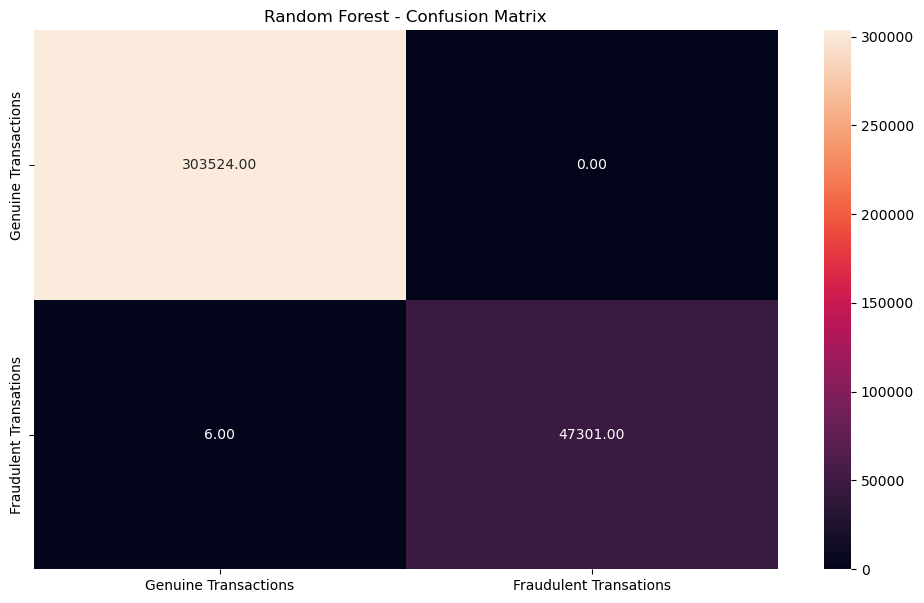

In [25]:
tx_types = ["Genuine Transactions", "Fraudulent Transations"]
df_cm_rf = pd.DataFrame(random_forests_confusionMatrix,
                     index = [i for i in tx_types],
                     columns = [i for i in tx_types])

plt.figure(figsize = (12,7))
seaborne_conf_matrix_dt = sns.heatmap(df_cm_rf,annot=True, fmt='.2f')
seaborne_conf_matrix_dt.set_title('Random Forest - Confusion Matrix')

# **K-Nearest Neighbours (kNN)**
## **Hyperparameter optimization for kNN**

In [21]:
kNearestNeighborsClassifier = KNeighborsClassifier()

hyperparameters_grid_search_kNN = {
    'n_neighbors' : [3, 5, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

grid_search_kNN = GridSearchCV(kNearestNeighborsClassifier,
                              hyperparameters_grid_search_kNN,
                              cv=5,
                              scoring='f1_macro',
                              verbose=4)

grid_search_kNN.fit(X_train, y_train)

print("Chosen hyperparameters that give best results in kNN: ")
print(grid_search_kNN.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.982 total time=  22.4s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.982 total time=  22.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.981 total time=  22.2s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.982 total time=  22.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.981 total time=  22.4s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.985 total time=   7.8s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.985 total time=   7.9s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.985 total time=   7.7s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.985 total time=   7.9s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.985 to

## **Training kNN using the above selected Hyperparameters**

In [26]:
kNearestNeighborsClassifier = KNeighborsClassifier(metric = 'manhattan',
                                                   n_neighbors = 3,
                                                   weights = 'distance')

kNearestNeighborsClassifier.fit(X_train, y_train)

kNN_prediction = kNearestNeighborsClassifier.predict(X_test)

kNN_accuracy = accuracy_score(y_test, kNN_prediction)
kNN_confusionMatrix = confusion_matrix(y_test, kNN_prediction)

## **Classification Report**

In [27]:
print("Classification Report:\n", classification_report(y_test, kNN_prediction, target_names=['Genuine Transaction', 'Fraudulent Transaction']))

Classification Report:
                         precision    recall  f1-score   support

   Genuine Transaction       1.00      1.00      1.00    303524
Fraudulent Transaction       1.00      1.00      1.00     47307

              accuracy                           1.00    350831
             macro avg       1.00      1.00      1.00    350831
          weighted avg       1.00      1.00      1.00    350831



## **Confusion Matrix**

Text(0.5, 1.0, 'kNN - Confusion Matrix')

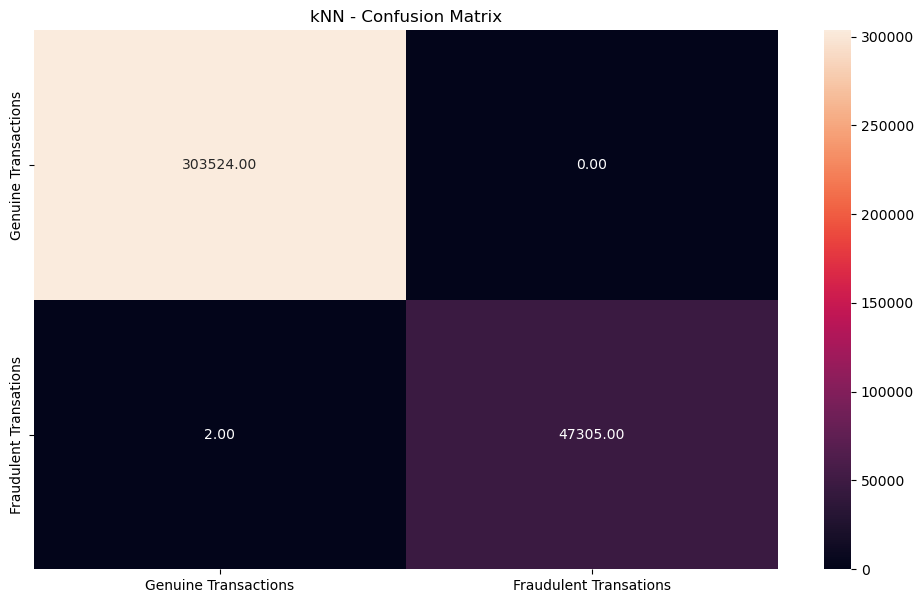

In [28]:
tx_types = ["Genuine Transactions", "Fraudulent Transations"]
df_cm_rf = pd.DataFrame(kNN_confusionMatrix,
                        index = [i for i in tx_types],
                        columns = [i for i in tx_types])

plt.figure(figsize = (12,7))
seaborne_conf_matrix_dt = sns.heatmap(df_cm_rf,annot=True, fmt='.2f')
seaborne_conf_matrix_dt.set_title('kNN - Confusion Matrix')

# **Finding feature importance**

In [21]:
randomForestModel =RandomForestClassifier()
randomForestModel.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
feature_scores = pd.Series(randomForestModel.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

TX_AMOUNT          0.965622
TX_TIME_SECONDS    0.032941
TX_TIME_DAYS       0.001436
dtype: float64

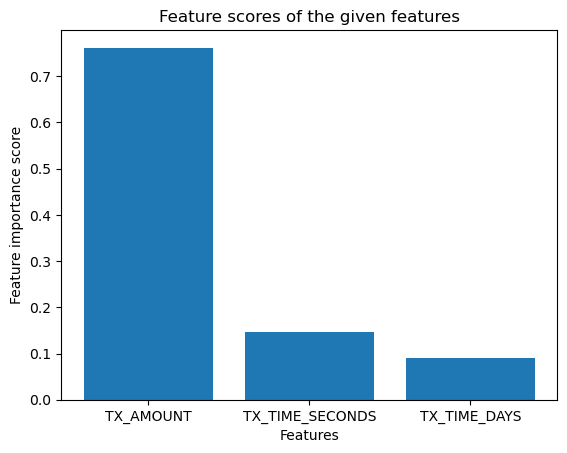

In [4]:
plt.xticks(range(len(feature_scores)), feature_scores.index)
plt.ylabel("Feature importance score")
plt.xlabel("Features")
plt.title("Feature scores of the given features")
plt.bar(range(len(feature_scores)), feature_scores) 
plt.show()